<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#библиотеки" data-toc-modified-id="библиотеки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>библиотеки</a></span></li><li><span><a href="#данные" data-toc-modified-id="данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>данные</a></span></li><li><span><a href="#обучение" data-toc-modified-id="обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>обучение</a></span></li></ul></div>

## библиотеки

In [1]:
# !pip install torch torchvision pandas

In [2]:
import pandas as pd
import numpy as np
import os
import torch
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [3]:
# Переменные
num_epochs=70

## данные

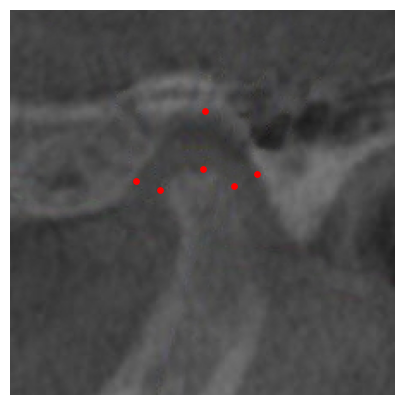

In [4]:
# Загрузим, выведем фото с нашей разметкой

# Путь к директории с фотографиями и CSV-файлом
foto_directory = r"E:\gnat\2"

# Чтение CSV файла
csv_file = os.path.join(foto_directory, "coords2.csv")  # Замените на имя вашего CSV файла
df = pd.read_csv(csv_file)

# Извлечение координат из JSON и создание столбцов x и y
df['x'] = df['region_shape_attributes'].apply(lambda s: json.loads(s).get('cx'))
df['y'] = df['region_shape_attributes'].apply(lambda s: json.loads(s).get('cy'))

# Группировка точек по имени файла
grouped = df.groupby('filename')

# Функция для отображения одного изображения с точками
def plot_image_with_points(filename, points_df):
    # Загрузка изображения
    img_path = os.path.join(foto_directory, filename)
    img = mpimg.imread(img_path)

    # Установка размера отображаемого изображения
    plt.figure(figsize=(5, 5))  # Увеличиваем размер изображения

    # Отображение изображения
    plt.imshow(img)
    plt.axis('off')  # Выключить оси

    # Нанесение всех точек
    for index, row in points_df.iterrows():
        plt.scatter(row['x'], row['y'], c='red', s=15)  # s - размер точки

    plt.show()

# Выбор одного изображения и его точек для отображения
sample_filename = list(grouped.groups.keys())[0]  # Преобразование в список и выбор первого имени файла
points_df = grouped.get_group(sample_filename)

# Отображение изображения с точками
plot_image_with_points(sample_filename, points_df)

In [5]:
df.head(12)

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,x,y
0,К8Пс 2.jpg,30912,{},6,0,"{""name"":""point"",""cx"":95,""cy"":112}",{},95,112
1,К8Пс 2.jpg,30912,{},6,1,"{""name"":""point"",""cx"":79,""cy"":107}",{},79,107
2,К8Пс 2.jpg,30912,{},6,2,"{""name"":""point"",""cx"":111,""cy"":95}",{},111,95
3,К8Пс 2.jpg,30912,{},6,3,"{""name"":""point"",""cx"":114,""cy"":67}",{},114,67
4,К8Пс 2.jpg,30912,{},6,4,"{""name"":""point"",""cx"":130,""cy"":112}",{},130,112
5,К8Пс 2.jpg,30912,{},6,5,"{""name"":""point"",""cx"":152,""cy"":95}",{},152,95
6,К68Лс 2.jpg,23298,{},6,0,"{""name"":""point"",""cx"":93,""cy"":102}",{},93,102
7,К68Лс 2.jpg,23298,{},6,1,"{""name"":""point"",""cx"":76,""cy"":89}",{},76,89
8,К68Лс 2.jpg,23298,{},6,2,"{""name"":""point"",""cx"":114,""cy"":87}",{},114,87
9,К68Лс 2.jpg,23298,{},6,3,"{""name"":""point"",""cx"":114,""cy"":61}",{},114,61


## обучение

In [6]:
# Определение уникальных фотографий и разделение на выборки
unique_photos = df['filename'].unique()
test_size_ratio = 0.15
test_photo_count = int(len(unique_photos) * test_size_ratio)
train_photos, test_photos = train_test_split(unique_photos, test_size=test_photo_count, random_state=1)
train_df = df[df['filename'].isin(train_photos)]
test_df = df[df['filename'].isin(test_photos)]

# Предобработка данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [7]:
test_df

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,x,y
36,К113Пс 2.jpg,27989,{},6,0,"{""name"":""point"",""cx"":84,""cy"":103}",{},84,103
37,К113Пс 2.jpg,27989,{},6,1,"{""name"":""point"",""cx"":59,""cy"":85}",{},59,85
38,К113Пс 2.jpg,27989,{},6,2,"{""name"":""point"",""cx"":107,""cy"":86}",{},107,86
39,К113Пс 2.jpg,27989,{},6,3,"{""name"":""point"",""cx"":101,""cy"":52}",{},101,52
40,К113Пс 2.jpg,27989,{},6,4,"{""name"":""point"",""cx"":130,""cy"":99}",{},130,99
41,К113Пс 2.jpg,27989,{},6,5,"{""name"":""point"",""cx"":160,""cy"":83}",{},160,83


D:\installed\anaconda3\envs\notebook\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\installed\anaconda3\envs\notebook\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [70/70], Loss: 30.547778

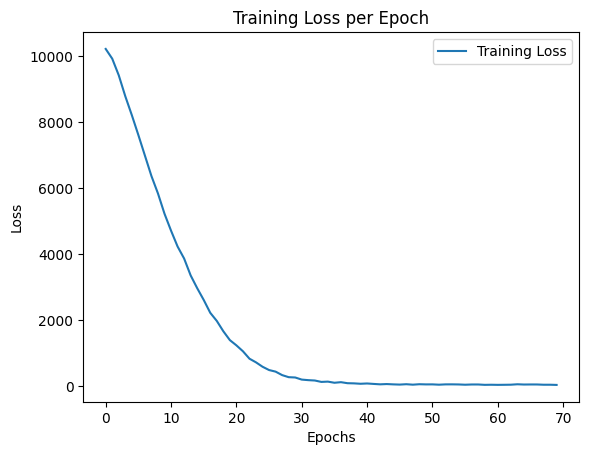

C:\Users\roman\AppData\Local\Temp\ipykernel_10704\633845582.py:102: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(outputs[i][::2], outputs[i][1::2], s=50, marker='.', c=(1, 1, 0))  #  c='y'


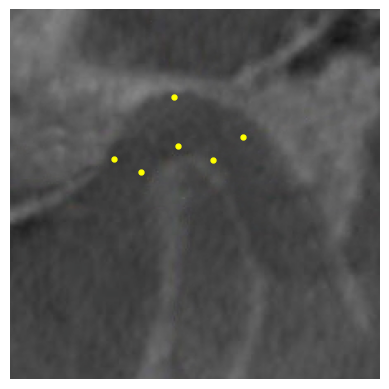

In [8]:
# Загрузка данных
class PointsDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe['filename'].unique())

    def __getitem__(self, idx):
        filename = self.dataframe['filename'].unique()[idx]
        image = Image.open(os.path.join(self.image_dir, filename)).convert('RGB')
        points = self.dataframe[self.dataframe['filename'] == filename][['x', 'y']].values.flatten()
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(points, dtype=torch.float32)

# Создание экземпляров датасета
train_dataset = PointsDataset(train_df, foto_directory, transform)
test_dataset = PointsDataset(test_df, foto_directory, transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Создание модели
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        # Использование ResNet50 как основы
        self.base_model = resnet50(pretrained=True)
        # Замена последнего слоя на новый для регрессии координат
        self.base_model.fc = nn.Linear(self.base_model.fc.in_features, 12)
    def forward(self, x):
        return self.base_model(x)

# Инициализация
model = RegressionModel()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)        

# Функция обучения
def train_model(model, train_loader, criterion, optimizer, num_epochs=1):
    model.train()
    best_loss = float('inf')
    best_model_wts = None
    epoch_losses = []  # Список для сохранения потерь каждой эпохи

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_losses.append(epoch_loss)  # Добавление потерь текущей эпохи в список

        # Обновление информации о текущей эпохе
        print(f'\rEpoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}', end='') # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

        # Сохранение лучшей модели
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            best_model_wts = model.state_dict()

    # Восстановление лучшей модели
    model.load_state_dict(best_model_wts)

    # Построение графика потерь
    plt.plot(epoch_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss per Epoch')
    plt.legend()
    plt.show()

    return model

trained_model = train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs)

# Тестирование
def test_model(model, test_loader, image_dir):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images).cpu().numpy()  # Получение прогнозов и перевод в numpy массив
            images = images.cpu().numpy()

            # Преобразование изображений из тензоров обратно в PIL изображения для отображения
            images = images.transpose((0, 2, 3, 1))  # Перестановка осей из (N,C,H,W) в (N,H,W,C)
            images = images * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Денормализация
            images = np.clip(images, 0, 1)  # Ограничение значений для корректного отображения

            # Отображение изображений и нанесение точек
            for i in range(len(images)):
                plt.imshow(images[i]) 
                plt.scatter(outputs[i][::2], outputs[i][1::2], s=50, marker='.', c=(1, 1, 0))  #  c='y'
                plt.axis('off')
                plt.show()

# Тест и вывод изображений с предсказанными точками
test_model(trained_model, test_loader, foto_directory)

In [9]:
# Предсказанные координаты
def test_model(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            print(outputs)

test_model(trained_model, test_loader)

tensor([[ 78.9483,  97.8182,  62.7098,  90.1648, 101.4922,  82.1962,  98.6154,
          52.3428, 122.5898,  90.5337, 140.7778,  76.6822]])
